In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, utils, datasets
from tensorflow.keras.callbacks import History


2024-10-27 23:17:15.242659: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-27 23:17:15.706098: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-27 23:17:15.708345: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-27 23:17:17.724025: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Parameters
NUM_CLASSES = 10
BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 0.0005

# Load and prepare data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

def create_model(activation):
    input_layer = layers.Input((32, 32, 3))
    
    x = layers.Flatten()(input_layer)
    x = layers.Dense(200)(x)
    x = get_activation_layer(activation)(x)
    x = layers.Dense(150)(x)
    x = get_activation_layer(activation)(x)
    
    output_layer = layers.Dense(NUM_CLASSES, activation="softmax")(x)
    
    return models.Model(input_layer, output_layer)

def get_activation_layer(activation_name):
    if activation_name == "leaky_relu":
        return layers.LeakyReLU(alpha=0.01)
    else:
        return layers.Activation(activation_name)

# Create and train models with different activations
activation_functions = ["relu", "leaky_relu", "sigmoid"]
histories = {}
test_scores = {}

for activation in activation_functions:
    print(f"\nTraining model with {activation} activation:")
    
    # Create and compile model
    model = create_model(activation)
    opt = optimizers.Adam(learning_rate=LEARNING_RATE)
    model.compile(
        loss="categorical_crossentropy",
        optimizer=opt,
        metrics=["accuracy"]
    )
    
    # Train model
    history = model.fit(
        x_train, y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        shuffle=True,
        validation_split=0.1,
        verbose=1
    )
    
    # Evaluate model
    test_score = model.evaluate(x_test, y_test, verbose=0)
    
    histories[activation] = history.history
    test_scores[activation] = test_score


170498071/170498071 [==============================] - 2s 0us/step

Training model with relu activation:
Epoch 1/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8756 - accuracy: 0.3222 - val_loss: 1.7620 - val_accuracy: 0.3680
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6907 - accuracy: 0.3950 - val_loss: 1.6373 - val_accuracy: 0.4130
Epoch 3/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6057 - accuracy: 0.4279 - val_loss: 1.5795 - val_accuracy: 0.4398
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5489 - accuracy: 0.4453 - val_loss: 1.5648 - val_accuracy: 0.4476
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5043 - accuracy: 0.4630 - val_loss: 1.4955 - val_accuracy: 0.4658
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4727 - accuracy: 0.4757 - val_loss: 1.5324 - val_accuracy: 0.4634
Epoch 7/10
1407/1407 [=========

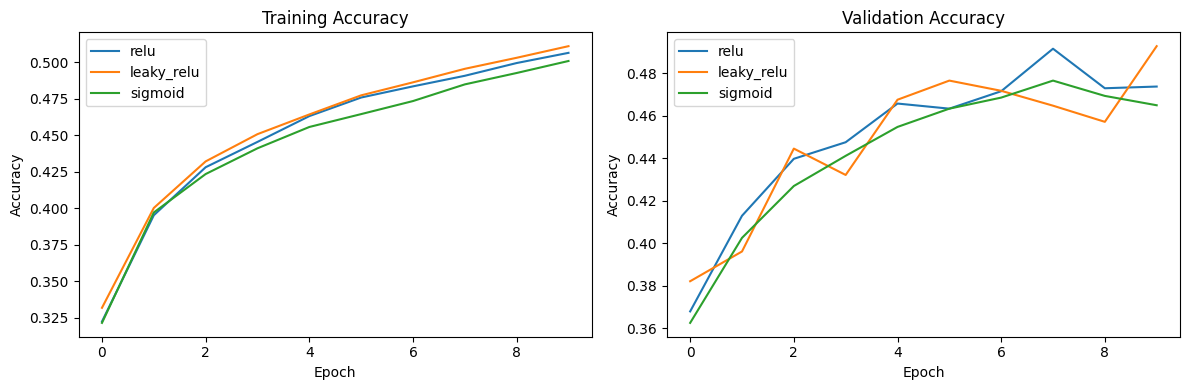


Final Test Results:

RELU Activation:
Test Loss: 1.4790
Test Accuracy: 0.4711

LEAKY_RELU Activation:
Test Loss: 1.4412
Test Accuracy: 0.4907

SIGMOID Activation:
Test Loss: 1.4899
Test Accuracy: 0.4640


In [4]:
 #Plotting training histories
plt.figure(figsize=(12, 4))

# Plot training accuracy
plt.subplot(1, 2, 1)
for activation in activation_functions:
    plt.plot(histories[activation]['accuracy'], label=f'{activation}')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
for activation in activation_functions:
    plt.plot(histories[activation]['val_accuracy'], label=f'{activation}')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Print final test results
print("\nFinal Test Results:")
for activation in activation_functions:
    print(f"\n{activation.upper()} Activation:")
    print(f"Test Loss: {test_scores[activation][0]:.4f}")
    print(f"Test Accuracy: {test_scores[activation][1]:.4f}")
    